<a href="https://colab.research.google.com/github/harshalkumeriya/Deep-Learning-using-Tensorflow/blob/master/Image_Classifier_(fashion_mnist)_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [2]:
from tensorflow import keras
keras.__version__

'2.3.0-tf'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train, X_valid = X_train_full[:55000] / 255.0 , X_train_full[55000:] / 255.0
X_test = X_test / 255.0
y_train, y_valid = y_train_full[:55000] , y_train_full[55000:]

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
X_valid.shape

(5000, 28, 28)

In [11]:
X_train.shape

(55000, 28, 28)

In [13]:
class_names[y_train[0]]

'Ankle boot'

In [15]:
#Keras sequential api

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


#model = keras.models.Sequential([
#    keras.layers.Flatten(input_shape=[28, 28]),
#    keras.layers.Dense(300, activation="relu"),
#    keras.layers.Dense(100, activation="relu"),
#    keras.layers.Dense(10, activation="softmax")
#])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
wt , b = model.layers[2].get_weights()

In [20]:
wt

array([[ 0.01700003, -0.02347652, -0.08489469, ...,  0.03882796,
        -0.03618193, -0.0064557 ],
       [-0.11117538, -0.06168912,  0.01231866, ..., -0.08172333,
         0.06499309,  0.02459835],
       [-0.02625941, -0.06442194,  0.08024029, ..., -0.05360349,
        -0.12192765, -0.01790635],
       ...,
       [-0.03895023, -0.11154559, -0.03680488, ..., -0.0738081 ,
         0.00574561,  0.07631695],
       [ 0.07745206, -0.04586834,  0.00052268, ...,  0.03938185,
        -0.10342994,  0.04457463],
       [ 0.04491069, -0.02832007,  0.08129112, ...,  0.05986244,
        -0.02386561,  0.0411737 ]], dtype=float32)

In [21]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [18]:
y_train = keras.utils.to_categorical(y_train)
y_valid = keras.utils.to_categorical(y_valid)
y_test = keras.utils.to_categorical(y_test)

In [22]:
model.compile(optimizer='Adam', loss = "categorical_crossentropy", metrics = ['accuracy'])

In [24]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = 128, epochs = 20, use_multiprocessing= True )

Epoch 1/20
430/430 [==============================] - 3s 6ms/step - loss: 0.5244 - accuracy: 0.8154 - val_loss: 0.4087 - val_accuracy: 0.8490
Epoch 2/20
430/430 [==============================] - 2s 6ms/step - loss: 0.3695 - accuracy: 0.8672 - val_loss: 0.3876 - val_accuracy: 0.8632
Epoch 3/20
430/430 [==============================] - 2s 6ms/step - loss: 0.3319 - accuracy: 0.8793 - val_loss: 0.3409 - val_accuracy: 0.8756
Epoch 4/20
430/430 [==============================] - 2s 6ms/step - loss: 0.3050 - accuracy: 0.8888 - val_loss: 0.3433 - val_accuracy: 0.8790
Epoch 5/20
430/430 [==============================] - 2s 6ms/step - loss: 0.2901 - accuracy: 0.8929 - val_loss: 0.3248 - val_accuracy: 0.8794
Epoch 6/20
430/430 [==============================] - 3s 6ms/step - loss: 0.2740 - accuracy: 0.9000 - val_loss: 0.3314 - val_accuracy: 0.8832
Epoch 7/20
430/430 [==============================] - 3s 6ms/step - loss: 0.2591 - accuracy: 0.9039 - val_loss: 0.3097 - val_accuracy: 0.8890
Epoch 

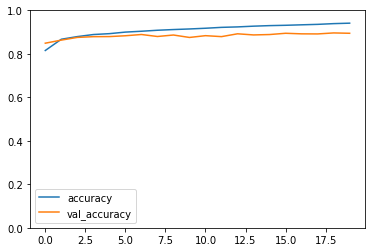

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.ylim(0,1)
plt.legend()
plt.show()

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8933


[0.34581297636032104, 0.8932999968528748]

In [35]:
y_proba = model.predict(X_test[:3])
y_proba

array([[6.0854273e-11, 1.0255892e-10, 1.0021861e-08, 3.5138156e-11,
        3.8672346e-10, 3.2843654e-06, 4.1210534e-08, 9.1369339e-04,
        4.5782293e-12, 9.9908292e-01],
       [8.9074054e-04, 2.1332903e-10, 9.9791855e-01, 5.3372862e-09,
        1.0973985e-03, 6.8688811e-15, 9.3214876e-05, 7.3721059e-14,
        9.0527591e-10, 9.6270119e-12],
       [5.5562346e-14, 1.0000000e+00, 8.1367838e-20, 4.2313749e-13,
        1.0946613e-18, 2.0374279e-24, 4.2758520e-16, 1.1216733e-24,
        6.3956124e-18, 9.7994520e-21]], dtype=float32)

In [56]:
import numpy as np
idx = np.argmax(y_proba, axis = 1).astype(np.int16)
ans = [class_names[i] for i in idx]
print(ans)

['Ankle boot', 'Pullover', 'Trouser']


In [57]:
siren = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]),
                                 keras.layers.Dense(300, activation=tf.math.sin, kernel_initializer= "he_uniform"),
                                 keras.layers.Dense(100, activation=tf.math.sin, kernel_initializer= "he_uniform"),
                                 keras.layers.Dense(10, activation="softmax")])

In [59]:
siren.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [60]:
siren.compile(optimizer='Adam', loss = "categorical_crossentropy", metrics = ['accuracy'])

In [61]:
siren_history = siren.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = 128, epochs = 20, use_multiprocessing= True )

Epoch 1/20
430/430 [==============================] - 3s 6ms/step - loss: 0.4811 - accuracy: 0.8283 - val_loss: 0.3841 - val_accuracy: 0.8604
Epoch 2/20
430/430 [==============================] - 2s 6ms/step - loss: 0.3636 - accuracy: 0.8687 - val_loss: 0.3525 - val_accuracy: 0.8744
Epoch 3/20
430/430 [==============================] - 2s 6ms/step - loss: 0.3216 - accuracy: 0.8820 - val_loss: 0.3401 - val_accuracy: 0.8714
Epoch 4/20
430/430 [==============================] - 2s 6ms/step - loss: 0.2936 - accuracy: 0.8916 - val_loss: 0.3396 - val_accuracy: 0.8730
Epoch 5/20
430/430 [==============================] - 2s 6ms/step - loss: 0.2784 - accuracy: 0.8966 - val_loss: 0.3242 - val_accuracy: 0.8842
Epoch 6/20
430/430 [==============================] - 2s 6ms/step - loss: 0.2629 - accuracy: 0.9036 - val_loss: 0.3401 - val_accuracy: 0.8746
Epoch 7/20
430/430 [==============================] - 2s 6ms/step - loss: 0.2493 - accuracy: 0.9073 - val_loss: 0.3193 - val_accuracy: 0.8840
Epoch 

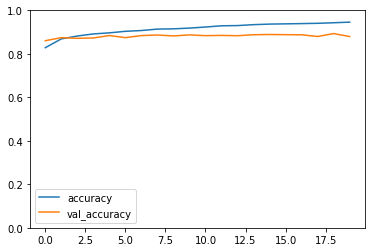

In [62]:
plt.plot(siren_history.history['accuracy'], label = "accuracy")
plt.plot(siren_history.history['val_accuracy'], label = "val_accuracy")
plt.ylim(0,1)
plt.legend()
plt.show()

In [64]:
siren.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.8759


[0.37104034423828125, 0.8758999705314636]